# Efectos de la Reanimacion Cardiopulmonar Extrahospitalaria Transtelefonica en la supervivencia del paciente en la ciudad de Madrid

## Introducccion
Reanimacion Cardiopulmonar (RCP)
Servicio de Atencion municipal de urgencia y rescate (SAMUR)

## Objetivos

El objetivo de este estudio es este estudio es comparar el Retorno de la Circulacion Espontanea (ROSC, por sus siglas en ingles) y la supervivencia del paciente a los 7 dias, comparando 3 grupos de pacientes: Aquellos que no recibieron RCP previa a la llegada de la primera unidad de Soporte Vital Avanzado (SVA); aquellos que recibieron RCP básica sin soporte telefónico; y aquellos que han recibido RCP transtelefonica hasta la llegada de la SVA.

## Metodologia
Esto es un estudio observacional de los datos proporcionados por SAMUR-Proteccion Civil, el servicio de emergencias extrahospitalarias de la ciudad de Madrid. Los datos fueron extraidos de la base de datos de SAMUR-PC y analizados utilizando Python y Pandas. Estos datos corresponden a todas las paradas cardiorrespiratorias atendidad por este servicio de emergencias extrahospitalaria en el espacio comprendido entre el 3 de enero al 31 de diciembre de 2024. A continuación se presentan las graficas donde se exponen las variables a estudiar.


TABLA

                  Variable  Media/Porcentaje  Número de Muestras
0                     Edad         64.079511                 327
1  Tiempo de Llegada (min)          8.329358                 327
2                     ROSC         53.516820                 175
3           Sexo Masculino         79.816514                 261
4     Supervivencia 7 Días         27.217125                  89
5      RCP Transtelefónica         15.290520                  50
6                  Sin RCP         49.541284                 162
7  RCP sin Transtelefónica         35.168196                 115
8      RCP Transtelefónica         15.290520                  50


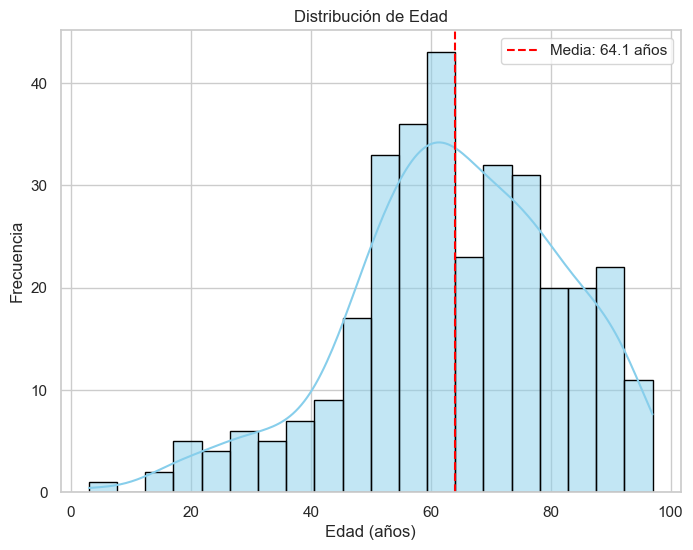

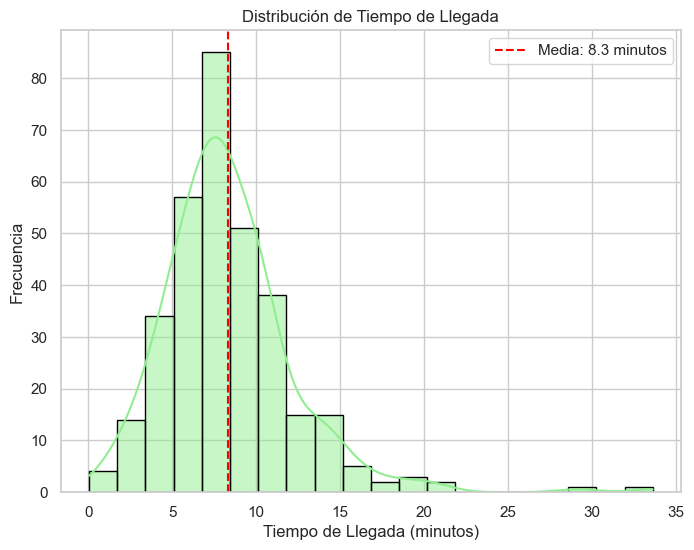

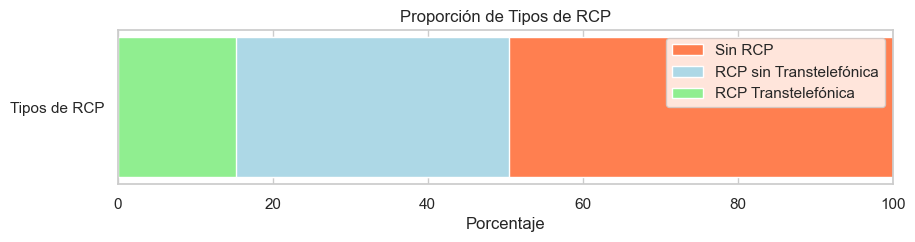

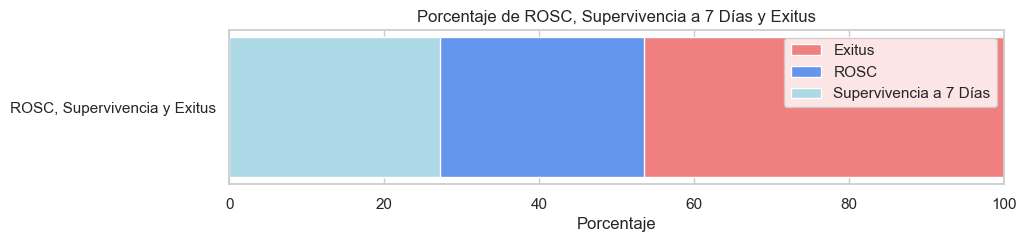

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the dataset
data_path = '/Users/miguel/Desktop/SAMUR/RCP Transtelefonica/data/cleaned_data.csv'
data = pd.read_csv(data_path)

# Convert time to minutes
data['TIEMPO_LLEGADA_MINUTOS'] = data['TIEMPO_LLEGADA_UNIDAD'] / 60

# Calculate RCP type proportions
rcp_types = {
    'Sin RCP': ((~data['RCP_TRANSTELEFONICA']) & (~data['RCP_EN_LLEGADA'])).mean() * 100,
    'RCP sin Transtelefónica': ((data['RCP_EN_LLEGADA']) & (~data['RCP_TRANSTELEFONICA'])).mean() * 100,
    'RCP Transtelefónica': (data['RCP_TRANSTELEFONICA']).mean() * 100
}

# Calculate ROSC and survival percentages
rosc_percentage = data['ROSC'].mean() * 100
survival_percentage = data['SOBREVIVE_7DIAS'].mean() * 100

# Ensure the output directory exists
output_dir = '/Users/miguel/Desktop/SAMUR/RCP Transtelefonica/proyecto/figures'
os.makedirs(output_dir, exist_ok=True)

# Visualizations
sns.set(style='whitegrid')

# Age distribution with mean line
plt.figure(figsize=(8, 6))
sns.histplot(data['EDAD'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.axvline(data['EDAD'].mean(), color='red', linestyle='--', label=f"Media: {data['EDAD'].mean():.1f} años")
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(os.path.join(output_dir, 'hist_edad_con_media.png'))
plt.show()

# Time to arrival distribution in minutes with mean line
plt.figure(figsize=(8, 6))
sns.histplot(data['TIEMPO_LLEGADA_MINUTOS'], bins=20, kde=True, color='lightgreen', edgecolor='black')
plt.axvline(data['TIEMPO_LLEGADA_MINUTOS'].mean(), color='red', linestyle='--', label=f"Media: {data['TIEMPO_LLEGADA_MINUTOS'].mean():.1f} minutos")
plt.title('Distribución de Tiempo de Llegada')
plt.xlabel('Tiempo de Llegada (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig(os.path.join(output_dir, 'hist_tiempo_llegada_con_media.png'))
plt.show()

# Single horizontal bar chart for RCP types
plt.figure(figsize=(10, 2))
plt.barh(['Tipos de RCP'], [100], color='coral', label='Sin RCP')
plt.barh(['Tipos de RCP'], [rcp_types['RCP sin Transtelefónica'] + rcp_types['RCP Transtelefónica']], 
         color='lightblue', label='RCP sin Transtelefónica')
plt.barh(['Tipos de RCP'], [rcp_types['RCP Transtelefónica']], 
         color='lightgreen', label='RCP Transtelefónica')
plt.title('Proporción de Tipos de RCP')
plt.xlabel('Porcentaje')
plt.xlim(0, 100)
plt.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'single_bar_rcp_tipos.png'))
plt.show()

# Single horizontal bar chart for ROSC, survival, and Exitus
plt.figure(figsize=(10, 2))
plt.barh(['ROSC, Supervivencia y Exitus'], [100], color='lightcoral', label='Exitus')
plt.barh(['ROSC, Supervivencia y Exitus'], [rosc_percentage + survival_percentage], color='cornflowerblue', label='ROSC')
plt.barh(['ROSC, Supervivencia y Exitus'], [survival_percentage], color='lightblue', label='Supervivencia a 7 Días')
plt.title('Porcentaje de ROSC, Supervivencia a 7 Días y Exitus')
plt.xlabel('Porcentaje')
plt.xlim(0, 100)
plt.legend(loc='upper right')
plt.savefig(os.path.join(output_dir, 'single_bar_rosc_survival_exitus.png'))
plt.show()

## Resultados

## Conclusiones